In [5]:
from utils import *
import h5py
import matplotlib.pyplot as plt

In [53]:
import imageio

In [43]:
img_path = './dataset_kalan_test/003.h5'

with h5py.File(img_path, 'r') as f:
    label = f['GT'][:]
    data1 = f['IN'][3*3:4*3, :, :]  # mid after gain adjustment
    data2 = f['IN'][4*3:5*3, :, :]  # mid after gain adjustment
    data3 = f['IN'][5*3:6*3, :, :]  # mid after gain adjustment
    

label = np.transpose(label, (2, 1, 0))
data1 = np.transpose(data1, (2, 1, 0))
data2 = np.transpose(data2, (2, 1, 0))
data3 = np.transpose(data3, (2, 1, 0))
print(label.shape)

(1000, 1500, 3)


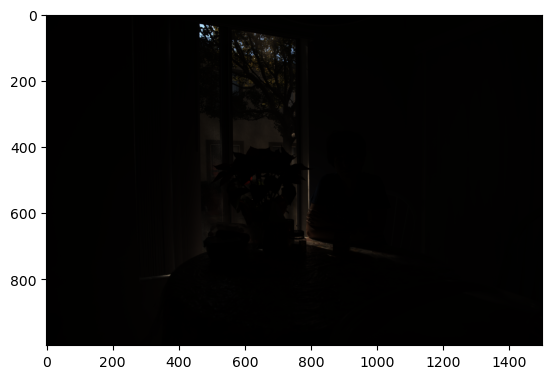

In [44]:
# no tone-mapping
plt.imshow(label)

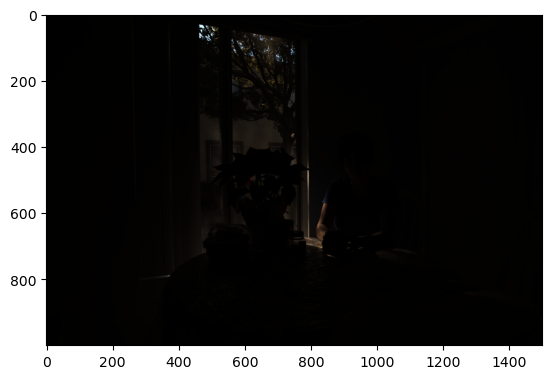

In [45]:

plt.imshow(data1)

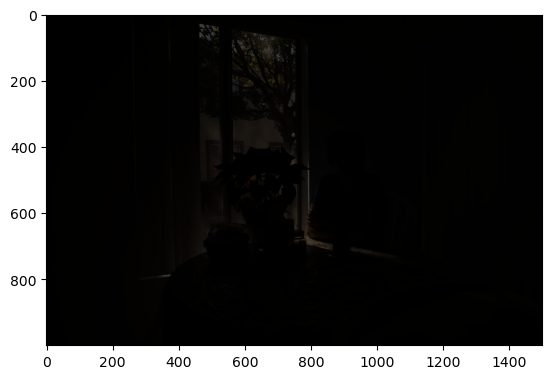

In [46]:

plt.imshow(data2)

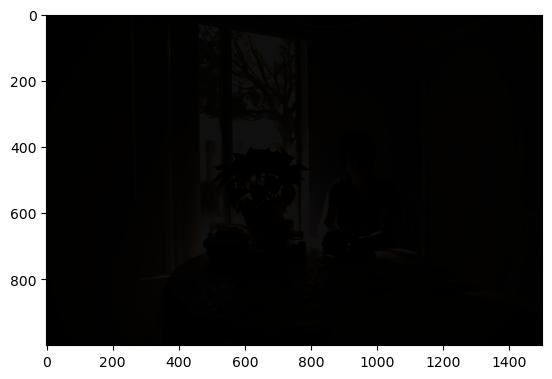

In [47]:

plt.imshow(data3)

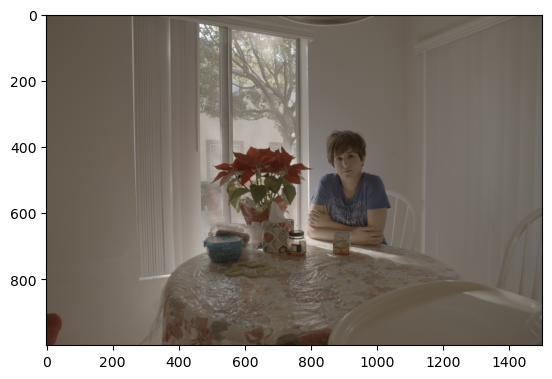

In [57]:
# mu_tonemap 
#return np.log(1 + mu * hdr_image) / np.log(1 + mu)
#label_mu = np.log(1 + 5000 * label) / np.log(np.array(1+5000))
label_mu = mu_tonemap(label)
plt.imshow(label_mu)

img = np.squeeze(label_mu*255.)
img = img.astype(np.uint8)
imageio.imwrite("./tonemap_test/label.jpg", img)


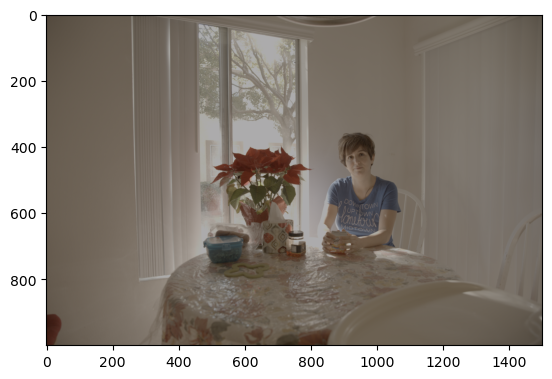

In [60]:

label_mu = mu_tonemap(data3)
plt.imshow(label_mu)
img = np.squeeze(label_mu*255.)
img = img.astype(np.uint8)
imageio.imwrite("./tonemap_test/data3.jpg", img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


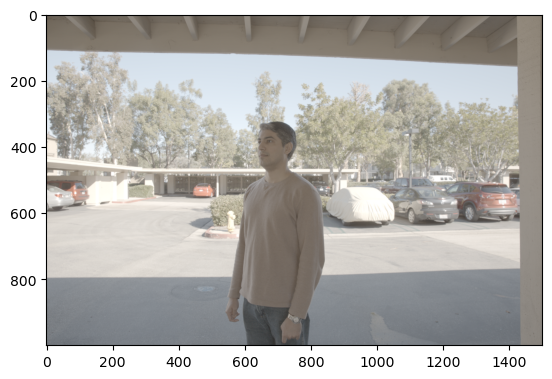

In [19]:
# norm_mu_tonemap 
# return mu_tonemap(hdr_image/norm_value, mu)
norm_perc = np.percentile(label, 99)
label_norm_mu = norm_mu_tonemap(label, norm_perc)
plt.imshow(label_norm_mu)

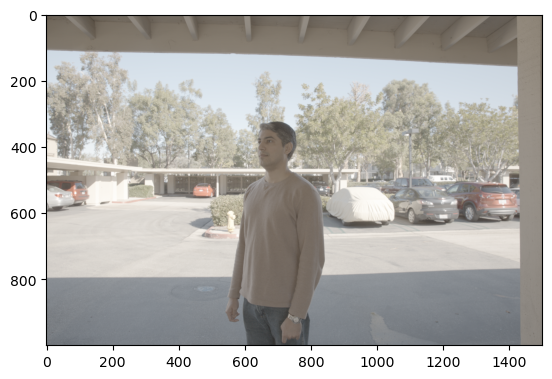

In [20]:
# tanh_norm_mu_tonemap 
#    bounded_hdr = np.tanh(hdr_image / norm_value)
#    return  mu_tonemap(bounded_hdr, mu)
label_tanh_norm_mu = tanh_norm_mu_tonemap(label, norm_perc)
plt.imshow(label_tanh_norm_mu)

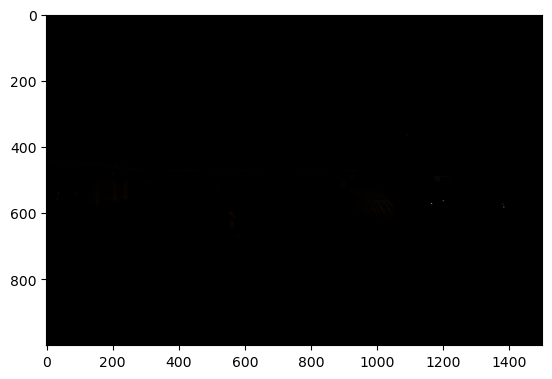

In [24]:
# gamma 2.24
gamma = 2.24
label_gamma = label ** gamma
plt.imshow(label_gamma)

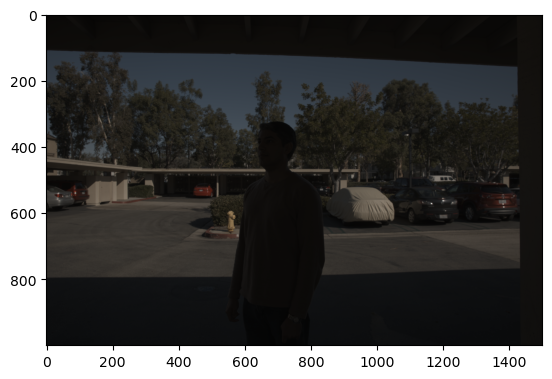

In [25]:
# gamma 1/2.24
gamma = 1/2.24
label_degamma = label ** gamma
plt.imshow(label_degamma)

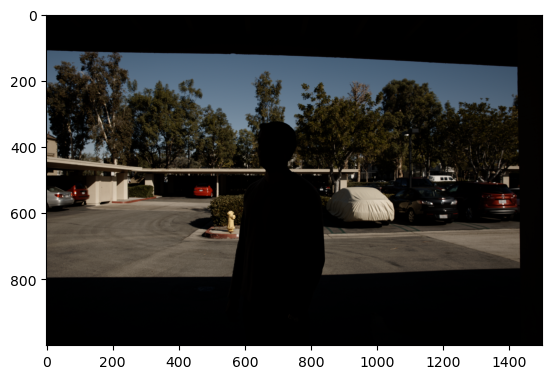

In [26]:
# gamma 2.24 + tanh_norm_mu_tonemap
label_gamma_tanh = tanh_norm_mu_tonemap(label_gamma, norm_perc)
plt.imshow(label_gamma_tanh)

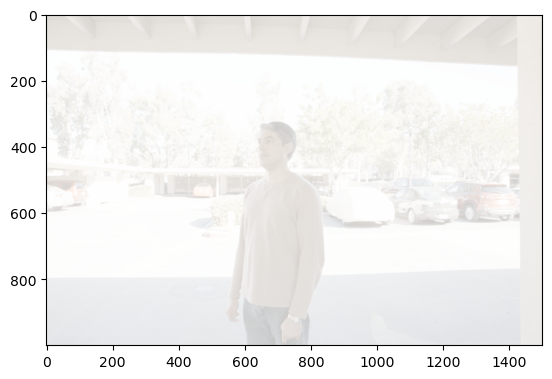

In [27]:
# gamma 1/2.24 + tanh_norm_mu_tonemap
label_degamma_tanh = tanh_norm_mu_tonemap(label_degamma, norm_perc)
plt.imshow(label_degamma_tanh)